In [1]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download --force -d mishra5001/credit-card

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mishra5001/credit-card
License(s): other
 97% 109M/112M [00:00<00:00, 159MB/s] 
100% 112M/112M [00:00<00:00, 152MB/s]


In [2]:
!unzip credit-card.zip

Archive:  credit-card.zip
  inflating: application_data.csv    
  inflating: columns_description.csv  
  inflating: previous_application.csv  


**Description of datasets**

* application_data.csv:

This dataset contains details about credit card applicants, including personal information such as age, income, employment status, and credit history. It is used to analyze the characteristics of individuals applying for credit and to identify patterns that might correlate with fraud.

* columns_description.csv:

This file provides a detailed description of the columns in the other datasets, explaining what each column represents. It serves as a data dictionary that helps understand the meaning and context of the variables in the datasets.

* previous_application.csv:

This dataset contains information about the applicant's previous credit applications. It includes details such as the type of credit, amount requested, credit history, and outcome of previous applications. This dataset helps to assess the applicant's credit behavior and the relationship between past applications and potential fraud detection.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stat

In [4]:
df1 = pd.read_csv('application_data.csv')
#df3 = pd.read_csv('columns_description.csv')
df2 = pd.read_csv('previous_application.csv')

df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(f" -Shape of df1 : {df1.shape}\n -Shape of df2 : {df2.shape}")

 -Shape of df1 : (307511, 122)
 -Shape of df2 : (1670214, 37)


In [8]:
df2.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

**Cleaning df1**

In [9]:
df1.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


 The next step will help us visualize the distribution of missing data across each column in a more detailed manner.


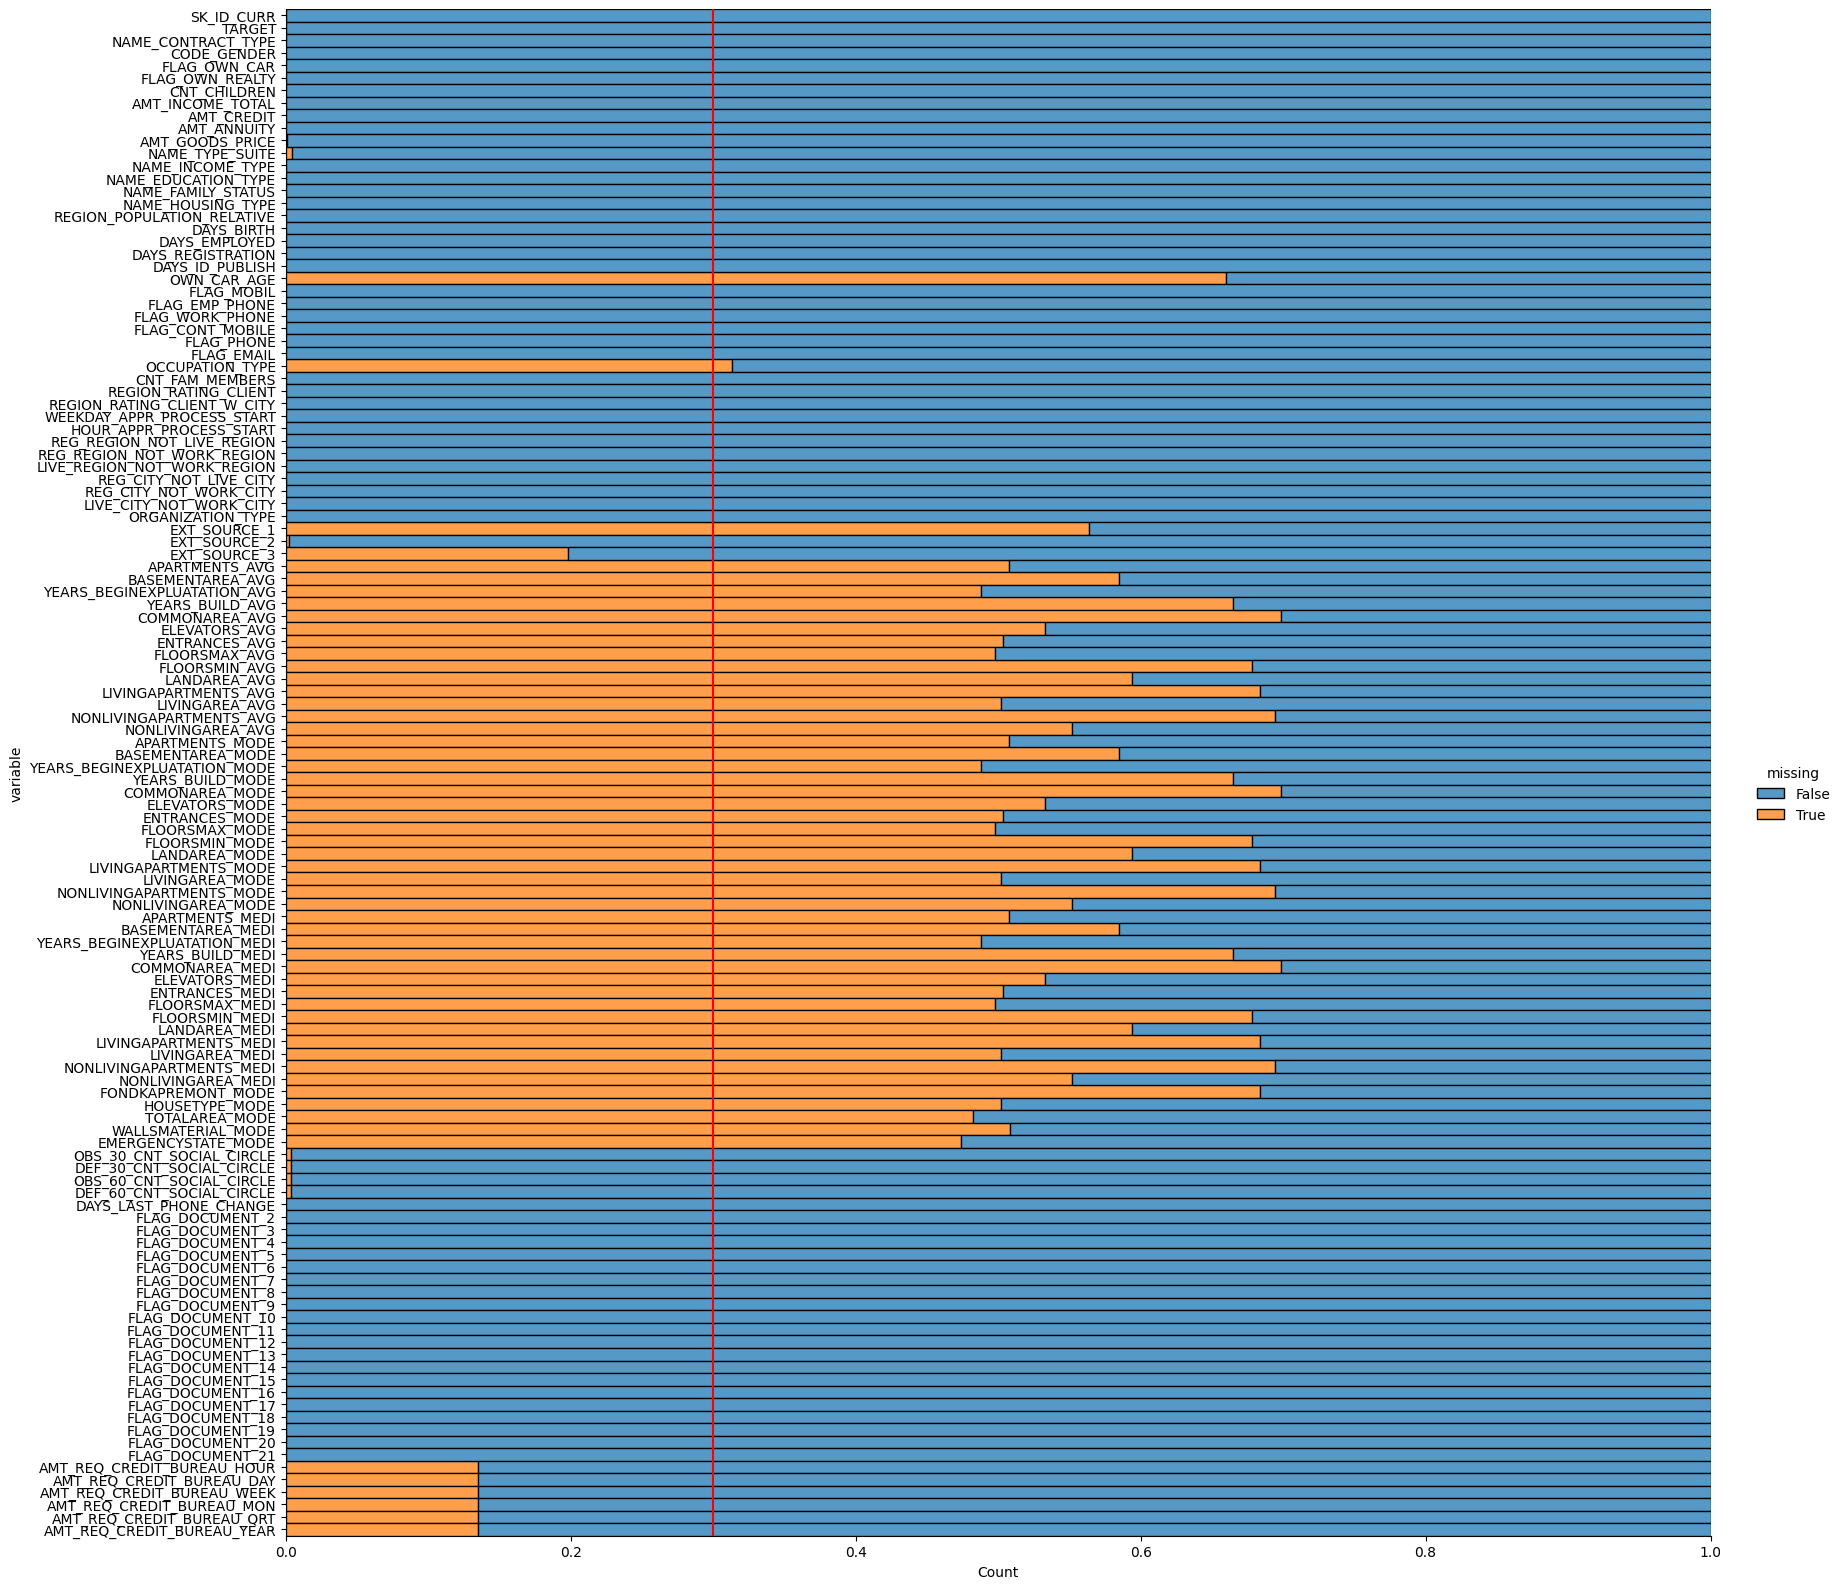

In [ ]:
sns.displot(
    data=df1.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=16,
    aspect=1.1
)

# specifying a threshold value
plt.axvline(0.3, color='r')

Before removing columns with missing data, it's important to set a threshold for how much missing data is acceptable. In this case, we decide to drop columns that have more than 30% missing data. This ensures that we only keep columns that have enough information to be useful for analysis. Below, we calculate the percentage of missing values in each column, and identify the ones that exceed the 30% threshold.

In [10]:
# Calculating the percentage of missing values in each column
percent_missing = df1.isnull().sum() * 100 / len(df1)

# Identifying columns with more than 30% missing data
cols_wih_missing_30 = percent_missing[percent_missing > 30].index.tolist()

# Printing the number of columns with over 30% missing values and their names
print(len(cols_wih_missing_30))
print(cols_wih_missing_30)

50
['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE'

afin de sovoir si ces colonnes sont importantes deans notre etudes , nous aurons besoin de vir keur interptation dans columns.csv

In [11]:
# Loading the columns description dataset with the appropriate encoding
df3 = pd.read_csv('columns_description.csv', encoding='ISO-8859-1')

# Filtering df3 to only keep rows corresponding to columns with more than 30% missing values
df3_filtered = df3[df3['Row'].isin(cols_wih_missing_30)]

# Displaying the filtered results with no column width restriction for better readability
pd.set_option("display.max_colwidth", None)
df3_filtered.head()

,Unnamed: 0,Table,Row,Description,Special
21,24,application_data,OWN_CAR_AGE,Age of client's car,NaN
28,31,application_data,OCCUPATION_TYPE,What kind of occupation does the client have,NaN
41,44,application_data,EXT_SOURCE_1,Normalized score from external data source,normalized
44,47,application_data,APARTMENTS_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
45,48,application_data,BASEMENTAREA_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized


The following analysis aims to determine if there is a significant relationship between each numerical feature and the TARGET variable by performing a one-way ANOVA test. A p-value less than 0.05 will suggest that the feature has a statistically significant relationship with TARGET. The results will help decide which features should be considered for further analysis in the modeling process.

In [12]:
# Retrieve the unique values in the 'TARGET' column (modalities)
modalities = df1['TARGET'].unique()
results = []  # Initialize an empty list to store the results

# Select only the numerical columns from df1
num_cols_liste = df1.select_dtypes(include=['number']).columns.tolist()
num_cols_liste.remove('TARGET')  # Exclude the target column as we are analyzing features
num_cols_liste.remove('SK_ID_CURR')  # Exclude the ID column, not relevant for the analysis

# Iterate through each numerical feature to perform ANOVA
for feature in num_cols_liste:
    # Perform the one-way ANOVA test to check if the means of the feature differ between TARGET groups
    st, p_value = stat.f_oneway(*[list(df1.loc[df1['TARGET'] == m, feature]) for m in modalities])

    # Check if the p-value is less than 0.05 to decide whether to reject the null hypothesis
    if p_value < 0.05:
        results.append([feature, p_value, 'rejetée', 'Oui'])  # Null hypothesis rejected
    else:
        results.append([feature, p_value, 'acceptée', 'Non'])  # Null hypothesis not rejected

# Create a DataFrame with the results, showing p-values and the status of the null hypothesis
anova_results = pd.DataFrame(results, columns=['Feature', 'p_value', 'H0 : Indépendance', 'H1 : Dépendance'])

# Sort the results by p-value in ascending order to easily identify significant features
anova_results.sort_values(by=['p_value'])


,Feature,p_value,H0 : Indépendance,H1 : Dépendance
6,DAYS_BIRTH,0.000000e+00,rejetée,Oui
19,REGION_RATING_CLIENT_W_CITY,2.078455e-250,rejetée,Oui
18,REGION_RATING_CLIENT,2.172433e-234,rejetée,Oui
9,DAYS_ID_PUBLISH,2.527524e-179,rejetée,Oui
25,REG_CITY_NOT_WORK_CITY,3.805463e-176,rejetée,Oui
...,...,...,...,...
99,AMT_REQ_CREDIT_BUREAU_DAY,NaN,acceptée,Non
100,AMT_REQ_CREDIT_BUREAU_WEEK,NaN,acceptée,Non
101,AMT_REQ_CREDIT_BUREAU_MON,NaN,acceptée,Non
102,AMT_REQ_CREDIT_BUREAU_QRT,NaN,acceptée,Non


In [13]:
# Count the number of features that are dependent on the TARGET variable (p-value < 0.05)
num_cols_target_depend = anova_results[anova_results['H1 : Dépendance'] == 'Oui'].shape[0]

# Count the number of features that are independent of the TARGET variable (p-value >= 0.05)
num_cols_target_independ = anova_results[anova_results['H1 : Dépendance'] == 'Non'].shape[0]

# Display the number of dependent and independent features
print(f"Number of features dependent on TARGET: {num_cols_target_depend}")
print(f"Number of features independent of TARGET: {num_cols_target_independ}")

Number of features dependent on TARGET: 31
Number of features independent of TARGET: 73


Since we have identified 73 features that are independent of TARGET (i.e., they do not show a statistically significant relationship with it), we will remove them from the dataset. This step helps reduce dimensionality and improves model efficiency by keeping only relevant features.

In [14]:
# Columns that are independent from TARGET based on the ANOVA test
cols_anova_to_drop = anova_results[anova_results['H1 : Dépendance'] == 'Non']['Feature'].tolist()

# Combine the columns with more than 30% missing values and those independent from TARGET
cols_to_drop = cols_wih_missing_30 + cols_anova_to_drop

# Drop these columns from the dataset
df1_reduced = df1.drop(columns=cols_to_drop)

# Display the updated number of columns in df1 after removal
print(f"Number of remaining columns in df1: {df1_reduced.shape[1]}")
print(f"Columns removed: {cols_to_drop}")


Number of remaining columns in df1: 44
Columns removed: ['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HO

In [15]:
df1_reduced.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18',
     

In [16]:
df1_reduced.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
NAME_TYPE_SUITE,1292


**Cleaning df2**

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [18]:
df2.isnull().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
AMT_ANNUITY,372235
AMT_APPLICATION,0
AMT_CREDIT,1
AMT_DOWN_PAYMENT,895844
AMT_GOODS_PRICE,385515
WEEKDAY_APPR_PROCESS_START,0
HOUR_APPR_PROCESS_START,0


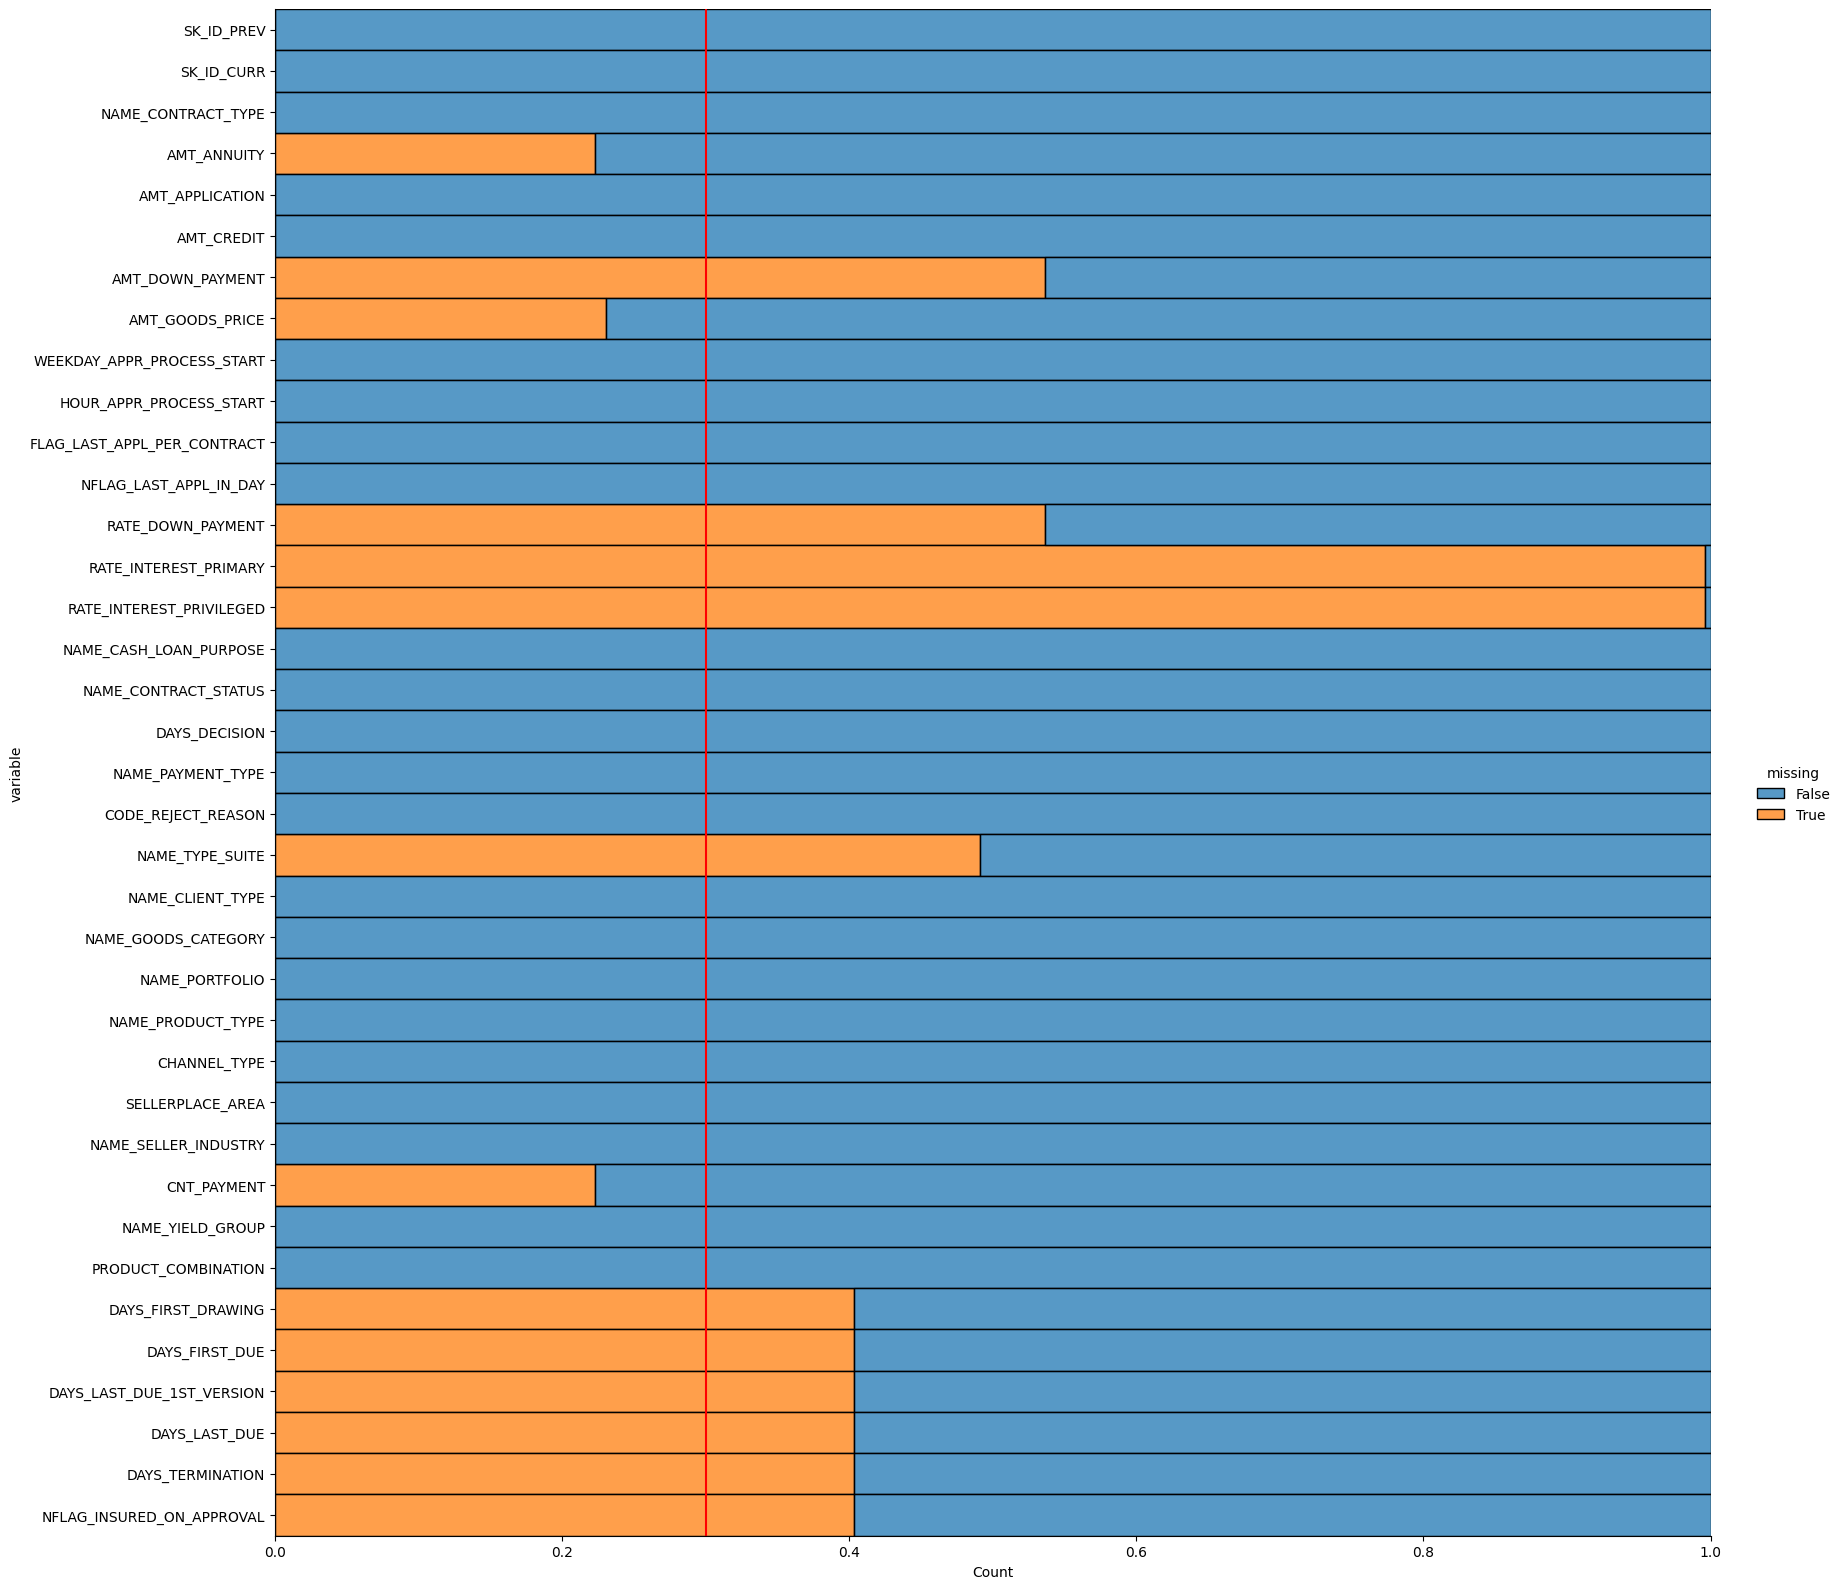

In [ ]:
sns.displot(
    data=df2.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=16,
    aspect=1.1
)

# specifying a threshold value
plt.axvline(0.3, color='r')

In [19]:
# List of columns for which we want to retrieve descriptions from the df3 dataset
cols_to_describe = ['CNT_PAYMENT', 'DAYS_FIRST_DUE', 'DAY_FIRST_DRAWING', 'DAY_TERMINATION']

# Filter df3 to keep only the rows corresponding to the selected columns
df3_filtered = df3[df3['Row'].isin(cols_to_describe)]

# Display the descriptions of the selected columns
print(df3_filtered[['Row', 'Description']])

                Row  \
151     CNT_PAYMENT   
155  DAYS_FIRST_DUE   

                                                                                                               Description  
151                                                     Term of previous credit at application of the previous application  
155  Relative to application date of current application when was the first due supposed to be of the previous application  


In [20]:
# Calculate the percentage of missing values for each column in df2
percent_missing_2 = df2.isnull().sum() * 100 / len(df2)

# Identify columns with more than 50% missing values
cols_wih_missing_2 = percent_missing_2[percent_missing_2 > 50].index.tolist()

print(len(cols_wih_missing_2))
print(cols_wih_missing_2)

4
['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']


In [21]:
df2_reduced = df2.drop(columns=cols_wih_missing_2)
df2_reduced.shape

(1670214, 33)

In [ ]:
#df2_reduced.describe()

In [ ]:
#df2.describe()

In [22]:
# Identify common columns between df1_reduced and df2_reduced
common_cols = df1_reduced.columns.intersection(df2_reduced.columns)

# Display the list of common columns
print(common_cols)


Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'NAME_TYPE_SUITE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'],
      dtype='object')


In [24]:
# Merge df1_reduced and df2_reduced on 'SK_ID_CURR' using an inner join
df_joined = pd.merge(df1_reduced, df2_reduced, on='SK_ID_CURR', how='inner')

# Display the shape of the merged dataframe
df_joined.shape


(1413701, 76)

In [25]:
df_joined.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE_x,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
DAYS_FIRST_DUE,561106
DAYS_LAST_DUE_1ST_VERSION,561106
DAYS_LAST_DUE,561106
DAYS_TERMINATION,561106


In [ ]:
df_joined.dtypes

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE_x,object
CODE_GENDER,object
FLAG_OWN_CAR,object
...,...
DAYS_FIRST_DUE,float64
DAYS_LAST_DUE_1ST_VERSION,float64
DAYS_LAST_DUE,float64
DAYS_TERMINATION,float64


Before proceeding with further analysis, we classify the columns into categorical and numerical types to better understand the dataset's structure

In [26]:
# Identify categorical columns (dtype 'object')
cat_cols = df_joined.select_dtypes(include=['object']).columns.tolist()

# Identify numerical columns (dtype 'number')
num_cols = df_joined.select_dtypes(include=['number']).columns.tolist()

# Display the number of categorical and numerical columns
print(f"Number of categorical columns in df_joined: {len(cat_cols)}")
print(f"Number of numerical columns in df_joined: {len(num_cols)}")


Number of categorical columns in df_joined: 27
Number of numerical columns in df_joined: 49


In [27]:
# Check for duplicate rows in df_joined
duplicate_count = df_joined.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows in df_joined: {duplicate_count}")


Number of duplicate rows in df_joined: 0


Although various feature selection methods exist, we will reduce our dataset to 10 columns: 5 numerical and 5 categorical. First, we use ANOVA for numerical columns, then the Chi2 test for categorical columns.

In [28]:
# Compute the correlation between numerical features and the target variable
corr_with_target = df_joined[num_cols].corr()['TARGET'].sort_values(ascending=False)
# Sauvegarde dans le répertoire Colab
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')
# Select the top 5 numerical features most correlated with the target
top_5_num_cols = corr_with_target[corr_with_target.index.isin(num_cols)].head(5)


<Figure size 640x480 with 0 Axes>

In [29]:
top_5_num_cols

,TARGET
TARGET,1.000000
DAYS_BIRTH,0.074866
REGION_RATING_CLIENT_W_CITY,0.059700
REGION_RATING_CLIENT,0.056932
DAYS_ID_PUBLISH,0.051037


Test Chi2

In [30]:
from sklearn.feature_selection import chi2
#fisrt we need to encode categoriel columns
cat_cols_encoded = pd.get_dummies(df_joined[cat_cols])

In [31]:
#Apply chi2 test
chi2_scores, p_values = chi2(cat_cols_encoded, df_joined['TARGET'])

In [32]:
# Create a DataFrame to store Chi-square test results for categorical features
chi2_results = pd.DataFrame({
    'Feature': cat_cols_encoded.columns,  # Categorical feature names
    'Chi2_Score': chi2_scores,  # Chi-square statistic
    'p_value': p_values  # Corresponding p-values
})

# Sort features by Chi-square score in descending order
chi2_results = chi2_results.sort_values(by='Chi2_Score', ascending=False)

# Select the top 5 categorical features based on the highest Chi-square scores
top_5_cat_cols = chi2_results.head(5)

# Display the selected categorical features
top_5_cat_cols


,Feature,Chi2_Score,p_value
144,NAME_CONTRACT_STATUS_Refused,3464.777016,0.0
18,NAME_INCOME_TYPE_Pensioner,2754.366776,0.0
103,ORGANIZATION_TYPE_XNA,2708.755973,0.0
24,NAME_EDUCATION_TYPE_Higher education,2688.544063,0.0
3,CODE_GENDER_M,2670.414405,0.0


In [33]:
# Print the list of the top 5 numerical features most correlated with the target variable
print(top_5_num_cols.index.tolist())

# Print the list of the top 5 categorical features most associated with the target variable based on the Chi-square test
print(top_5_cat_cols['Feature'].tolist())


['TARGET', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_ID_PUBLISH']
['NAME_CONTRACT_STATUS_Refused', 'NAME_INCOME_TYPE_Pensioner', 'ORGANIZATION_TYPE_XNA', 'NAME_EDUCATION_TYPE_Higher education', 'CODE_GENDER_M']


In [34]:
# Define the top 5 categorical features based on the Chi-square test
top_5_cat_cols = ['NAME_CONTRACT_STATUS', 'NAME_INCOME_TYPE', 'ORGANIZATION_TYPE',
                  'NAME_EDUCATION_TYPE', 'CODE_GENDER']

# Define the top 5 numerical features based on correlation with the target variable
top_5_num_cols = ['SK_ID_CURR', 'TARGET', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY',
                  'REGION_RATING_CLIENT', 'DAYS_ID_PUBLISH']

# Create a new dataframe containing only the selected top features
df = df_joined[top_5_num_cols + top_5_cat_cols]

# Display the first rows of the new dataframe
df.head()


,SK_ID_CURR,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,NAME_CONTRACT_STATUS,NAME_INCOME_TYPE,ORGANIZATION_TYPE,NAME_EDUCATION_TYPE,CODE_GENDER
0,100002,1,-9461,2,2,-2120,Approved,Working,Business Entity Type 3,Secondary / secondary special,M
1,100003,0,-16765,1,1,-291,Approved,State servant,School,Higher education,F
2,100003,0,-16765,1,1,-291,Approved,State servant,School,Higher education,F
3,100003,0,-16765,1,1,-291,Approved,State servant,School,Higher education,F
4,100004,0,-19046,2,2,-2531,Approved,Working,Government,Secondary / secondary special,M


In [35]:
df.shape

(1413701, 11)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 11 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   SK_ID_CURR                   1413701 non-null  int64 
 1   TARGET                       1413701 non-null  int64 
 2   DAYS_BIRTH                   1413701 non-null  int64 
 3   REGION_RATING_CLIENT_W_CITY  1413701 non-null  int64 
 4   REGION_RATING_CLIENT         1413701 non-null  int64 
 5   DAYS_ID_PUBLISH              1413701 non-null  int64 
 6   NAME_CONTRACT_STATUS         1413701 non-null  object
 7   NAME_INCOME_TYPE             1413701 non-null  object
 8   ORGANIZATION_TYPE            1413701 non-null  object
 9   NAME_EDUCATION_TYPE          1413701 non-null  object
 10  CODE_GENDER                  1413701 non-null  object
dtypes: int64(6), object(5)
memory usage: 118.6+ MB


In [37]:
df.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
DAYS_BIRTH,0
REGION_RATING_CLIENT_W_CITY,0
REGION_RATING_CLIENT,0
DAYS_ID_PUBLISH,0
NAME_CONTRACT_STATUS,0
NAME_INCOME_TYPE,0
ORGANIZATION_TYPE,0
NAME_EDUCATION_TYPE,0


df.describe()

Now that our dataset is cleaned and ready for analysis, we will begin by focusing on the columns DAYS_BIRTH and DAYS_ID_PUBLISH. These columns contain negative values that need to be transformed to make them more interpretable. DAYS_BIRTH will be converted into age, while DAYS_ID_PUBLISH will be transformed into an absolute date. After these transformations, we can proceed with further analysis and feature engineering.

In [38]:
df["DAYS_BIRTH"].unique()

array([ -9461, -16765, -19046, ...,  -7857, -25061, -24864])

the values of DAYS_BIRTH are negative , we can deduce that these values represent the number of days since each individual’s birth, relative to the current date. The negative sign simply indicates that these individuals are living, with the magnitude of the number representing how many days have passed since their birth.

To convert these negative values into a more interpretable format—age in years—we will create a new column AGE by taking the absolute value of DAYS_BIRTH, dividing it by 365 to get years, and rounding the result to one decimal place. This transformation will give us the individuals' age in a more understandable and usable format for further analysis.

In [39]:
df = df.copy()  # Copie du DataFrame pour éviter le warning
df['AGE'] = round(abs(df['DAYS_BIRTH']) / 365, 1)
df['AGE'].unique()

array([25.9, 45.9, 52.2, 52.1, 54.6, 46.4, 37.7, 51.6, 55.1, 39.6, 27.9,
       55.9, 36.8, 38.6, 40. , 23.9, 35.4, 26.8, 48.5, 31.1, 40.6, 30.5,
       68. , 30.9, 53. , 43.7, 27.4, 28.3, 41.9, 35.5, 32. , 43.8, 33.3,
       47.1, 57.7, 65.5, 44.2, 47.9, 46.5, 36.7, 64.5, 26.9, 21.8, 55.8,
       54. , 50. , 51. , 33.6, 28.7, 59.2, 38.9, 56.3, 21.7, 62.6, 33.5,
       33. , 53.6, 42.1, 32.8, 29.7, 32.9, 42.2, 40.7, 30.6, 39.1, 48.1,
       53.3, 26.5, 62.8, 51.2, 48. , 47.6, 63.1, 43.6, 49.7, 57.8, 50.8,
       54.3, 35. , 29.4, 41.5, 40.4, 61.6, 26.4, 46. , 30. , 65. , 65.9,
       35.3, 58.5, 28.8, 37.9, 64.8, 25.2, 55.6, 39.3, 36.4, 62.7, 44.6,
       62.9, 44.8, 45.3, 44.1, 50.4, 32.7, 39. , 33.8, 40.1, 45.7, 44.4,
       60.2, 41.4, 31.9, 48.4, 39.2, 52.8, 31.2, 42.7, 37.1, 67.8, 55.4,
       59.9, 42. , 38.3, 59.8, 49. , 35.1, 31.7, 35.9, 57.1, 46.3, 63. ,
       53.5, 50.1, 34.7, 45.1, 38.4, 38. , 27.7, 59.5, 54.2, 37.3, 36.2,
       38.8, 37.2, 38.2, 49.2, 48.9, 50.2, 45.5, 43

In [40]:
df["AGE"].nunique()

482

In [41]:
print(f"The Maximal Age is {df['AGE'].max()} years old")
print(f"The Minimal Age is {df['AGE'].min()} years old")

The Maximal Age is 69.0 years old
The Minimal Age is 20.5 years old


In [42]:
df["DAYS_ID_PUBLISH"].unique()

array([-2120,  -291, -2531, ..., -5906, -5854, -6211])

Similar to the DAYS_BIRTH column, the DAYS_ID_PUBLISH column contains negative values,  which represent the number of days before the publication date relative to the current date. The negative sign indicates that the event (in this case, the publication) occurred in the past, and the magnitude of the number reflects how many days ago the publication took place.

To convert these values into an actual date format, we will create a new column PUBLISH_DATE by adding the absolute value of DAYS_ID_PUBLISH as a time delta to the current date (today). This will give us the exact date of publication. We will ensure that the time component is excluded by using .dt.date.

In [43]:
# Convertir les jours en dates réelles sans l'heure
df['PUBLISH_DATE'] = (pd.to_datetime('today') + pd.to_timedelta(df['DAYS_ID_PUBLISH'], unit='D')).dt.date

df['PUBLISH_DATE']

,PUBLISH_DATE
0,2019-05-14
1,2024-05-16
2,2024-05-16
3,2024-05-16
4,2018-03-29
...,...
1413696,2024-01-18
1413697,2024-01-18
1413698,2024-01-18
1413699,2024-01-18


In [44]:
# Select the numerical columns, excluding the TARGET column
df_num_cols = df[["AGE", "REGION_RATING_CLIENT_W_CITY", "REGION_RATING_CLIENT"]]

# Select the categorical columns (top 5 selected categorical features)
df_cat_cols = df[top_5_cat_cols]


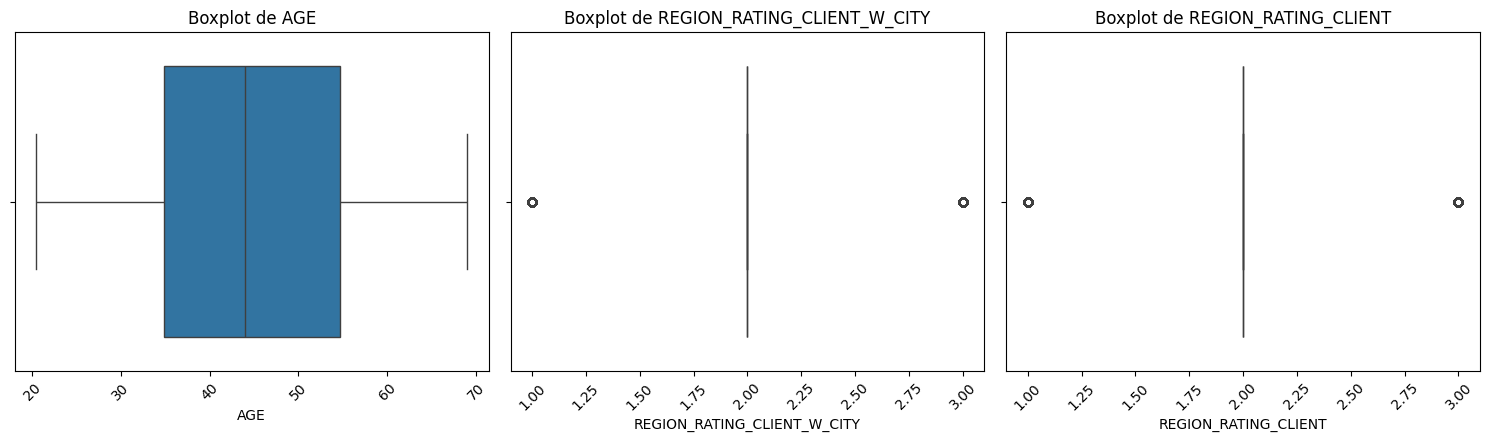

In [45]:
# Boxplot pour chaque variable numérique individuellement
plt.figure(figsize=(15, 8))

# Créer un boxplot pour chaque variable dans df_num_cols
for i, col in enumerate(df_num_cols.columns):
    plt.subplot(2, 3, i + 1)  # Organiser les graphiques en une grille (ici 2 lignes et 3 colonnes)
    sns.boxplot(x=df_num_cols[col])
    plt.title(f"Boxplot de {col}")
    plt.xticks(rotation=45)

plt.tight_layout()  # Ajuste l'espacement des graphiques pour qu'ils ne se chevauchent pas
plt.show()


In [46]:
print(df[['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']].describe())


       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY
count          1.413701e+06                 1.413701e+06
mean           2.059638e+00                 2.037603e+00
std            4.957797e-01                 4.886431e-01
min            1.000000e+00                 1.000000e+00
25%            2.000000e+00                 2.000000e+00
50%            2.000000e+00                 2.000000e+00
75%            2.000000e+00                 2.000000e+00
max            3.000000e+00                 3.000000e+00


These two columns, REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY, have boxplots that appear flat due to the nature of their distribution. Both columns contain only three distinct values: 1, 2, and 3, corresponding to different region ratings. The statistics show that:

Mean and Median (50% percentile) are the same: Both of these values are either 2 or 2 across the dataset for each column, indicating a concentration of data points at this central value.
25% and 75% percentiles are also 2: This further confirms that a significant portion of the data points are clustered around the value 2.
Low Standard Deviation: The standard deviation is very small (0.49 and 0.49), indicating that there is very little variation in the data, which is consistent with the boxplot appearing flat.

We can conclude that our dataset doesn't contains outliers.

Now that we have preprocessed and cleaned the dataset, it's important to understand the distributions of the variables. To do this, we will visualize the distributions of the numerical features using histograms, and for the categorical variables, we will use countplots.

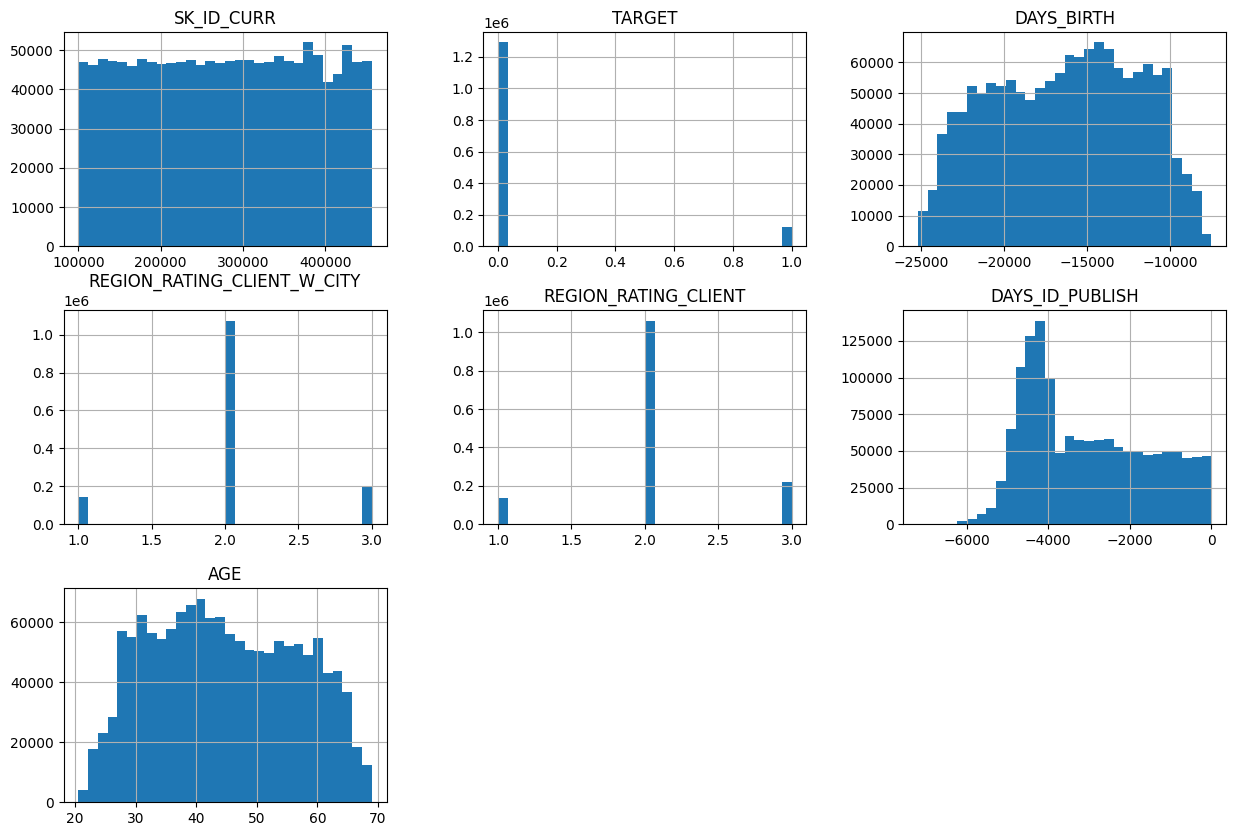

In [47]:
# Visualisation des distributions
df.hist(figsize=(15, 10), bins=30)
# Sauvegarde dans le répertoire Colab
plt.savefig("distributions-df.png", dpi=300, bbox_inches='tight')
plt.show()

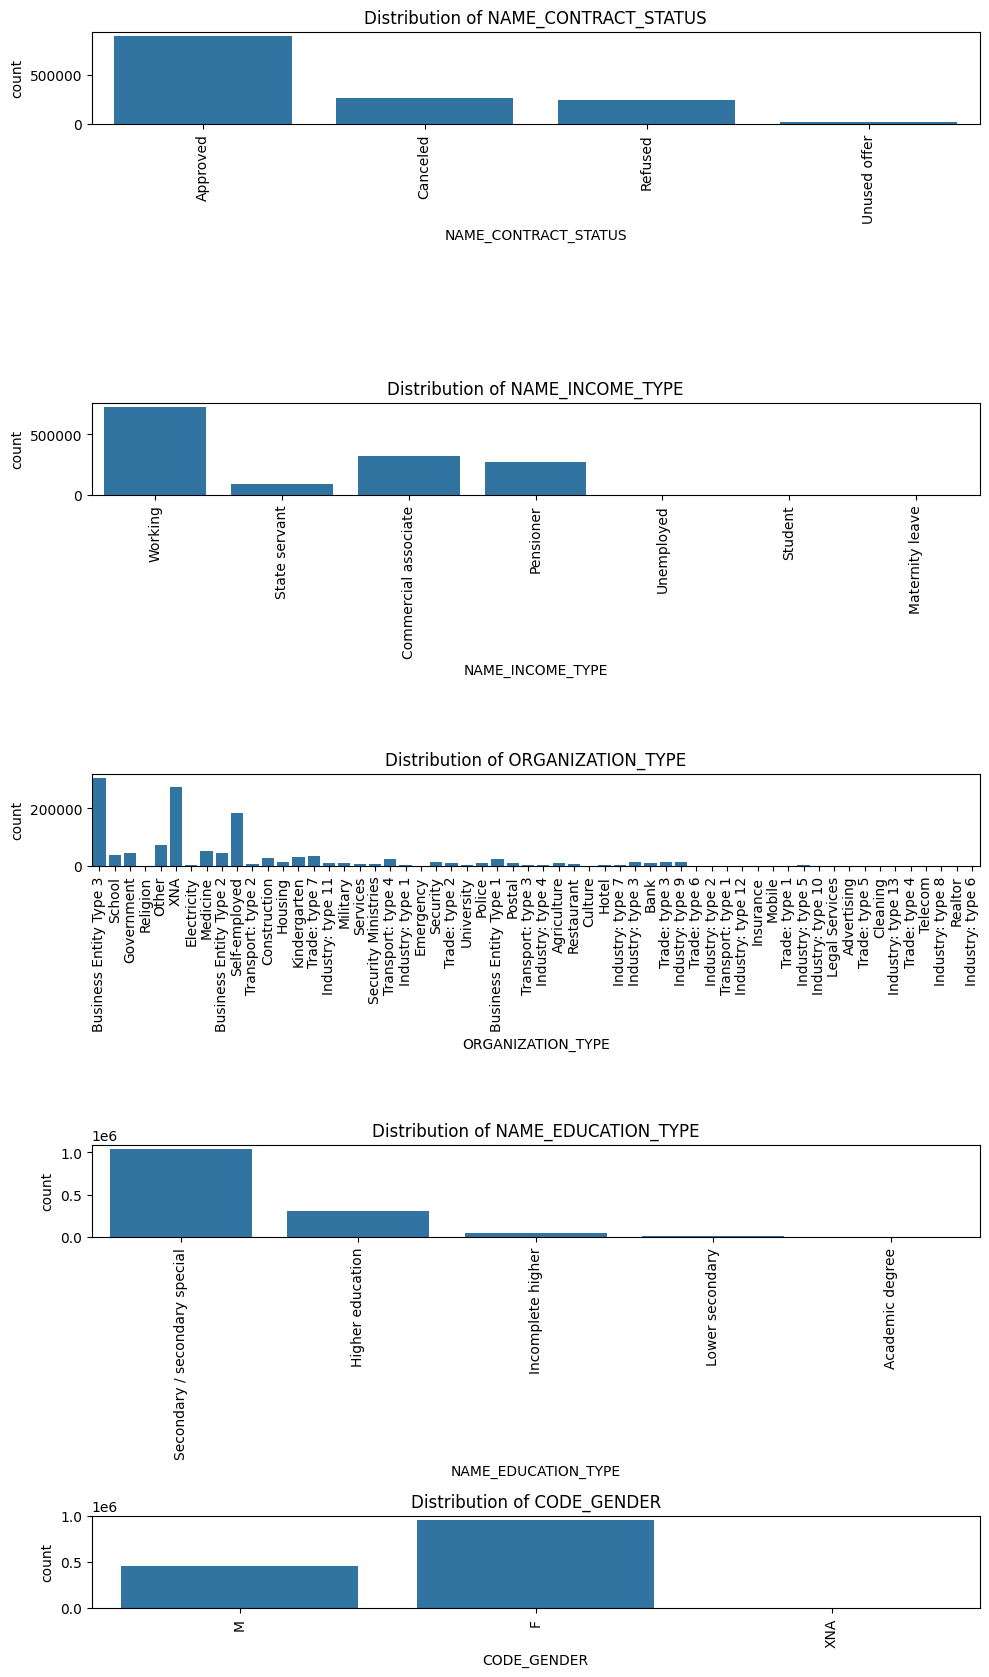

In [48]:
# For categorical columns, create subplots for each variable
plt.figure(figsize=(10, 20))
for i, col in enumerate(df_cat_cols.columns):
    plt.subplot(6, 1, i + 1)  # Organizing plots into a grid (6 rows, 1 column)
    sns.countplot(x=col, data=df_cat_cols)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)  # Rotate x-axis labels if they are too long

# Adjust spacing between plots
plt.tight_layout()
# Sauvegarde dans le répertoire Colab
plt.savefig("countplot-df.png", dpi=300, bbox_inches='tight')
plt.show()


We see hear that target is not balanced

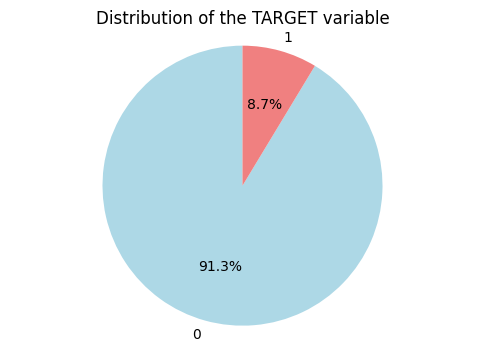

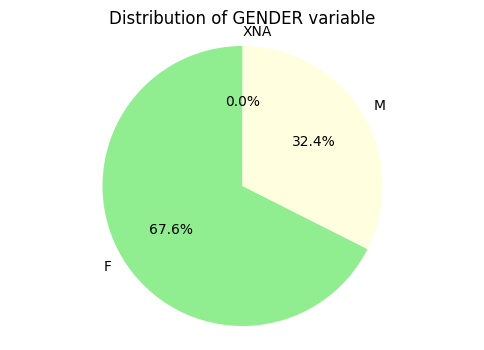

In [50]:
# Tracer le graphique en cercle pour TARGET
plt.figure(figsize=(6, 4))
target_counts = df['TARGET'].value_counts()
target_labels = target_counts.index
target_sizes = target_counts.values

# Tracer le pie chart pour 'TARGET'
plt.pie(target_sizes, labels=target_labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of the TARGET variable')
plt.axis('equal')  # Pour avoir un cercle parfait
# Sauvegarde dans le répertoire Colab
plt.savefig("piechart-target.png", dpi=300, bbox_inches='tight')
plt.show()

# Tracer le graphique en cercle pour GENDER
plt.figure(figsize=(6, 4))
gender_counts = df['CODE_GENDER'].value_counts()
gender_labels = gender_counts.index  # Obtenir les étiquettes des valeurs
gender_sizes = gender_counts.values  # Obtenir les tailles (fréquences)

# Tracer le pie chart pour 'GENDER'
plt.pie(gender_sizes, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightyellow'])
plt.title('Distribution of GENDER variable')
plt.axis('equal')  # Pour avoir un cercle parfait
plt.savefig("piechart-gender.png", dpi=300, bbox_inches='tight')
plt.show()
